# Import Modules

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Read from csv files

In [68]:
full_data = pd.read_csv("../Data/Input/full_data.csv")
confirmed_cases = pd.read_csv("../Data/Input/covid_confirmed_usafacts.csv")
deaths = pd.read_csv("../Data/Input/covid_deaths_usafacts.csv")
population = pd.read_csv("../Data/Input/covid_county_population_usafacts.csv")

# Task 1: Member Task

## Confirmed Cases weekly

In [69]:
confirmed_cases.head()

,countyFIPS,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,1928,1949,1966,1983,1989,1999,2010,2021,2023,2030
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,6270,6285,6333,6350,6369,6375,6405,6443,6475,6615
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,950,965,968,977,981,981,988,996,997,1012
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,744,761,771,775,785,789,791,801,811,825


## Confirmed Cases for the state of California

In [70]:
confirmed_cases_CA = confirmed_cases[confirmed_cases.State == 'CA']
new_case_CA = confirmed_cases_CA.set_index(['countyFIPS', 'County Name', 'State', 'stateFIPS'])
new_case_CA.head()

,,,,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20
countyFIPS,County Name,State,stateFIPS,,,,,,,,,,,,,,,,,,,,,
0,Statewide Unallocated,CA,6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6000,Grand Princess Cruise Ship,CA,6,0,0,0,0,0,0,0,0,0,0,...,21,21,21,21,21,21,21,21,21,21
6001,Alameda County,CA,6,0,0,0,0,0,0,0,0,0,0,...,22325,22370,22408,22459,22636,22738,22807,22932,23001,23133
6003,Alpine County,CA,6,0,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
6005,Amador County,CA,6,0,0,0,0,0,0,0,0,0,0,...,271,272,272,272,272,276,276,276,287,291


In [71]:
case_totals_CA = new_case_CA.sum()

## Confirmed weekly new cases for the state of California

In [72]:
data_weekly_CA = {}
week_CA = 1
last_day_CA = 3
data_weekly_CA[0] = [new_case_CA.columns[3], case_totals_CA[3]]
for x in range(10,case_totals_CA.size,7): #displays the last day of each week across state of CA
    data_weekly_CA[week_CA] = [new_case_CA.columns[x], case_totals_CA[x] - case_totals_CA[last_day_CA]]
    week_CA += 1
    last_day_CA = x

In [73]:
weekly_cases_CA = pd.DataFrame.from_dict(data_weekly_CA, orient = 'index', columns = ['week', 'cases'])
weekly_cases_CA.head(10)

,week,cases
0,1/25/20,0
1,2/1/20,4
2,2/8/20,2
3,2/15/20,2
4,2/22/20,4
5,2/29/20,10
6,3/7/20,97
7,3/14/20,385
8,3/21/20,1300
9,3/28/20,4254


In [74]:
weekly_cases_CA.mean()

cases    22394.974359
dtype: float64

In [75]:
weekly_cases_CA.median()

cases    18829.0
dtype: float64

## Deaths for the state of California

In [76]:
deaths.head()

,countyFIPS,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,28,28,28,28,28,28,29,30,30,30
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,66,66,67,67,67,67,69,69,69,69
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,9
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,13,13,13,13,13,13,14,14,14,14


In [77]:
deaths_CA = deaths[deaths.State == 'CA']
new_deaths_CA = deaths_CA.set_index(['countyFIPS', 'County Name', 'State', 'stateFIPS'])
new_deaths_CA.head()

,,,,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20
countyFIPS,County Name,State,stateFIPS,,,,,,,,,,,,,,,,,,,,,
0,Statewide Unallocated,CA,6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6000,Grand Princess Cruise Ship,CA,6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6001,Alameda County,CA,6,0,0,0,0,0,0,0,0,0,0,...,432,432,432,432,432,432,432,435,456,456
6003,Alpine County,CA,6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6005,Amador County,CA,6,0,0,0,0,0,0,0,0,0,0,...,15,15,15,16,16,16,16,16,16,16


In [78]:
deaths_totals_CA = new_deaths_CA.sum()

In [79]:
data_deaths_CA = {}
week_CA = 1
last_day_CA = 3
data_deaths_CA[0] = [new_deaths_CA.columns[3], deaths_totals_CA[3]]
for x in range(10,deaths_totals_CA.size,7):
    data_deaths_CA[week_CA] = [new_deaths_CA.columns[x], deaths_totals_CA[x] - deaths_totals_CA[last_day_CA]]
    week_CA += 1
    last_day_CA = x

In [80]:
weekly_deaths_CA = pd.DataFrame.from_dict(data_deaths_CA, orient = 'index', columns = ['week', 'cases'])
weekly_deaths_CA.head(10)

,week,cases
0,1/25/20,0
1,2/1/20,0
2,2/8/20,1
3,2/15/20,0
4,2/22/20,1
5,2/29/20,0
6,3/7/20,2
7,3/14/20,3
8,3/21/20,23
9,3/28/20,94


In [81]:
weekly_deaths_CA.mean()

cases    434.717949
dtype: float64

In [82]:
weekly_deaths_CA.median()

cases    463.0
dtype: float64

## Confirmed weekly cases for other states NY, GA, NC, and FL

In [83]:
confirmed_cases_NY = confirmed_cases[confirmed_cases.State == 'NY']
confirmed_cases_GA = confirmed_cases[confirmed_cases.State == 'GA']
confirmed_cases_NC = confirmed_cases[confirmed_cases.State == 'NC']
confirmed_cases_FL = confirmed_cases[confirmed_cases.State == 'FL']

In [84]:
new_case_NY = confirmed_cases_NY.set_index(['countyFIPS', 'County Name', 'State', 'stateFIPS'])
new_case_GA = confirmed_cases_GA.set_index(['countyFIPS', 'County Name', 'State', 'stateFIPS'])
new_case_NC = confirmed_cases_NC.set_index(['countyFIPS', 'County Name', 'State', 'stateFIPS'])
new_case_FL = confirmed_cases_FL.set_index(['countyFIPS', 'County Name', 'State', 'stateFIPS'])

In [85]:
case_totals_NY = new_case_NY.sum()
case_totals_GA = new_case_GA.sum()
case_totals_NC = new_case_NC.sum()
case_totals_FL = new_case_FL.sum()

In [86]:
data_weekly_states = {}
week_states = 1
last_day_states = 3
data_weekly_states[0] = [new_case_CA.columns[3], case_totals_CA[3], case_totals_NY[3], case_totals_GA[3], case_totals_NC[3], case_totals_FL[3]]
for x in range(10,case_totals_CA.size,7): #displays last day of each week across multiple states
    data_weekly_states[week_states] = [new_case_CA.columns[x], case_totals_CA[x] - case_totals_CA[last_day_states], case_totals_NY[x] - case_totals_NY[last_day_states], case_totals_GA[x] - case_totals_GA[last_day_states], case_totals_NC[x] - case_totals_NC[last_day_states], case_totals_FL[x] - case_totals_FL[last_day_states]]
    week_states += 1
    last_day_states = x

In [87]:
weekly_cases_states = pd.DataFrame.from_dict(data_weekly_states, orient = 'index', columns = ['week', 'CA', 'NY', 'GA', 'NC', 'FL'])
weekly_cases_states.head(10)

,week,CA,NY,GA,NC,FL
0,1/25/20,0,0,0,0,0
1,2/1/20,4,0,0,0,0
2,2/8/20,2,0,0,0,0
3,2/15/20,2,0,0,0,0
4,2/22/20,4,0,0,0,0
5,2/29/20,10,0,0,0,0
6,3/7/20,97,77,5,2,6
7,3/14/20,385,450,61,30,90
8,3/21/20,1300,11681,489,151,666
9,3/28/20,4254,41095,1890,746,3276


In [88]:
weekly_cases_states.mean()

CA    22394.974359
NY    12383.589744
GA     8701.769231
NC     6278.487179
FL    19294.333333
dtype: float64

In [89]:
weekly_cases_states.median()

CA    18829.0
NY     5276.0
GA     5888.0
NC     6943.0
FL     7506.0
dtype: float64

<AxesSubplot:xlabel='week'>

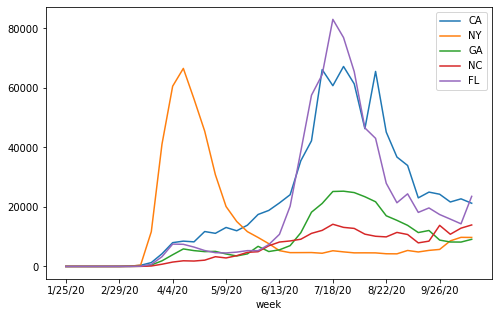

In [90]:
weekly_cases_states.set_index('week').plot(figsize=(8,5))

## Weekly deaths for other states NY, GA, NC, and FL

In [91]:
deaths_NY = deaths[deaths.State == 'NY']
deaths_GA = deaths[deaths.State == 'GA']
deaths_NC = deaths[deaths.State == 'NC']
deaths_FL = deaths[deaths.State == 'FL']

In [92]:
new_deaths_NY = deaths_NY.set_index(['countyFIPS', 'County Name', 'State', 'stateFIPS'])
new_deaths_GA = deaths_GA.set_index(['countyFIPS', 'County Name', 'State', 'stateFIPS'])
new_deaths_NC = deaths_NC.set_index(['countyFIPS', 'County Name', 'State', 'stateFIPS'])
new_deaths_FL = deaths_FL.set_index(['countyFIPS', 'County Name', 'State', 'stateFIPS'])

In [93]:
deaths_totals_NY = new_deaths_NY.sum()
deaths_totals_GA = new_deaths_GA.sum()
deaths_totals_NC = new_deaths_NC.sum()
deaths_totals_FL = new_deaths_FL.sum()

In [94]:
data_deaths_states = {}
week_states = 1
last_day_states = 3
data_deaths_states[0] = [new_deaths_CA.columns[3], deaths_totals_CA[3], deaths_totals_NY[3], deaths_totals_GA[3], deaths_totals_NC[3], deaths_totals_FL[3]]
for x in range(10,deaths_totals_CA.size,7):
    data_deaths_states[week_states] = [new_deaths_CA.columns[x], deaths_totals_CA[x] - deaths_totals_CA[last_day_states], deaths_totals_NY[x] - deaths_totals_NY[last_day_states], deaths_totals_GA[x] - deaths_totals_GA[last_day_states], deaths_totals_NC[x] - deaths_totals_NC[last_day_states], deaths_totals_FL[x] - deaths_totals_FL[last_day_states]]
    week_states += 1
    last_day_states = x

In [95]:
weekly_deaths_states = pd.DataFrame.from_dict(data_deaths_states, orient = 'index', columns = ['week', 'CA', 'NY', 'GA', 'NC', 'FL'])
weekly_deaths_states.head(10)

,week,CA,NY,GA,NC,FL
0,1/25/20,0,0,0,0,0
1,2/1/20,0,0,0,0,0
2,2/8/20,1,0,0,0,0
3,2/15/20,0,0,0,0,0
4,2/22/20,1,0,0,0,0
5,2/29/20,0,0,0,0,0
6,3/7/20,2,0,0,0,2
7,3/14/20,3,3,1,0,1
8,3/21/20,23,75,19,0,7
9,3/28/20,94,914,58,4,46


In [96]:
weekly_deaths_states.mean()

CA    434.717949
NY    847.871795
GA    195.000000
NC    100.589744
FL    408.128205
dtype: float64

In [97]:
weekly_deaths_states.median()

CA    463.0
NY     85.0
GA    216.0
NC    112.0
FL    304.0
dtype: float64

## County cases in California

In [98]:
counties_cases_CA = confirmed_cases[confirmed_cases.State == 'CA']
counties_cases_CA.head()

,countyFIPS,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20
191,0,Statewide Unallocated,CA,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
192,6000,Grand Princess Cruise Ship,CA,6,0,0,0,0,0,0,...,21,21,21,21,21,21,21,21,21,21
193,6001,Alameda County,CA,6,0,0,0,0,0,0,...,22325,22370,22408,22459,22636,22738,22807,22932,23001,23133
194,6003,Alpine County,CA,6,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
195,6005,Amador County,CA,6,0,0,0,0,0,0,...,271,272,272,272,272,276,276,276,287,291


In [99]:
population_CA = population[population.State == 'CA']
population_CA.head()

,countyFIPS,County Name,State,population
191,0,Statewide Unallocated,CA,0
192,6000,Grand Princess Cruise Ship,CA,0
193,6001,Alameda County,CA,1671329
194,6003,Alpine County,CA,1129
195,6005,Amador County,CA,39752


In [100]:
highest_county_cases = counties_cases_CA.sort_values(by=['10/17/20'], ascending=False, axis=0).head(10)
highest_county_cases.head(5)

,countyFIPS,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20
211,6037,Los Angeles County,CA,6,0,0,0,0,1,1,...,285016,286183,287222,288136,288451,289366,289366,290486,294065,296821
225,6065,Riverside County,CA,6,0,0,0,0,0,0,...,62900,63125,63284,63284,63284,64075,64668,65056,65386,65757
228,6071,San Bernardino County,CA,6,0,0,0,0,0,0,...,58936,59169,59463,59602,59696,59779,60495,60495,61550,61726
222,6059,Orange County,CA,6,0,0,0,0,1,1,...,56283,56436,56587,56672,56868,57071,57373,57635,57848,58010
229,6073,San Diego County,CA,6,0,0,0,0,0,0,...,51327,51470,51781,51982,51982,52355,53000,53263,53498,53928


In [101]:
highest_cases = confirmed_cases[confirmed_cases['County Name'] == 'Los Angeles County']

## County deaths in California

In [102]:
counties_deaths_CA = deaths[deaths.State == 'CA']
counties_deaths_CA.head()

,countyFIPS,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20
191,0,Statewide Unallocated,CA,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
192,6000,Grand Princess Cruise Ship,CA,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
193,6001,Alameda County,CA,6,0,0,0,0,0,0,...,432,432,432,432,432,432,432,435,456,456
194,6003,Alpine County,CA,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
195,6005,Amador County,CA,6,0,0,0,0,0,0,...,15,15,15,16,16,16,16,16,16,16


In [103]:
highest_county_deaths = counties_deaths_CA.sort_values(by=['9/7/20'], ascending=False, axis=0)
highest_county_deaths.head(5)

,countyFIPS,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20
211,6037,Los Angeles County,CA,6,0,0,0,0,0,0,...,6812,6834,6855,6863,6876,6877,6877,6944,6956,6974
225,6065,Riverside County,CA,6,0,0,0,0,0,0,...,1264,1269,1269,1269,1269,1272,1273,1275,1279,1279
222,6059,Orange County,CA,6,0,0,0,0,0,0,...,1360,1391,1401,1409,1409,1410,1412,1423,1434,1440
228,6071,San Bernardino County,CA,6,0,0,0,0,0,0,...,986,988,989,998,1021,1021,1028,1065,1070,1070
229,6073,San Diego County,CA,6,0,0,0,0,0,0,...,844,847,850,853,853,853,857,863,866,867


In [104]:
highest_county_deaths = highest_county_deaths.set_index(['countyFIPS','County Name','State','stateFIPS'])
top_5_deaths = highest_county_deaths.iloc[:5]
top_5_deaths

,,,,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20
countyFIPS,County Name,State,stateFIPS,,,,,,,,,,,,,,,,,,,,,
6037,Los Angeles County,CA,6,0,0,0,0,0,0,0,0,0,0,...,6812,6834,6855,6863,6876,6877,6877,6944,6956,6974
6065,Riverside County,CA,6,0,0,0,0,0,0,0,0,0,0,...,1264,1269,1269,1269,1269,1272,1273,1275,1279,1279
6059,Orange County,CA,6,0,0,0,0,0,0,0,0,0,0,...,1360,1391,1401,1409,1409,1410,1412,1423,1434,1440
6071,San Bernardino County,CA,6,0,0,0,0,0,0,0,0,0,0,...,986,988,989,998,1021,1021,1028,1065,1070,1070
6073,San Diego County,CA,6,0,0,0,0,0,0,0,0,0,0,...,844,847,850,853,853,853,857,863,866,867


<AxesSubplot:xlabel='countyFIPS,County Name,State,stateFIPS'>

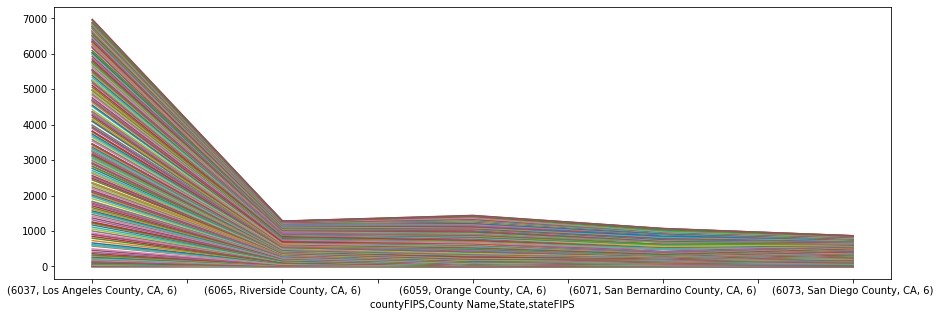

In [105]:
top_5_deaths.plot(legend=False, figsize=(15,5))

### Los Angeles County has the highest number of cases/deaths in the state of California

# Task 2

In [106]:
confirmed_cases_CA.head()

,countyFIPS,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20
191,0,Statewide Unallocated,CA,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
192,6000,Grand Princess Cruise Ship,CA,6,0,0,0,0,0,0,...,21,21,21,21,21,21,21,21,21,21
193,6001,Alameda County,CA,6,0,0,0,0,0,0,...,22325,22370,22408,22459,22636,22738,22807,22932,23001,23133
194,6003,Alpine County,CA,6,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
195,6005,Amador County,CA,6,0,0,0,0,0,0,...,271,272,272,272,272,276,276,276,287,291


In [107]:
cases_sum = pd.DataFrame(confirmed_cases_CA.sum()[4:], columns=['CA cases sum'])
cases_sum

,CA cases sum
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,2
...,...
10/19/20,879572
10/20/20,883574
10/21/20,886954
10/22/20,893770


<AxesSubplot:ylabel='Frequency'>

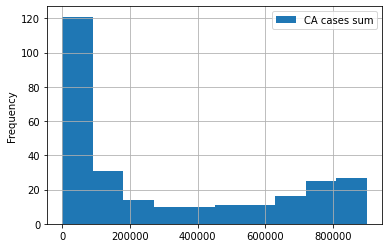

In [108]:
cases_sum.plot(kind='hist', grid=True)

<AxesSubplot:ylabel='Frequency'>

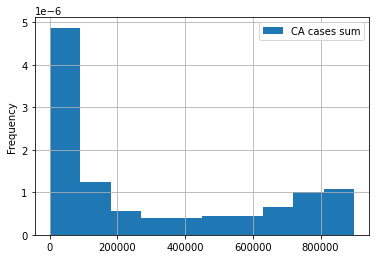

In [109]:
cases_sum.plot(kind='hist', density=True, grid=True)

In [110]:
employment = pd.read_csv("../Data/Input/allhlcn201.csv")

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [111]:
employment_updated = employment[employment['St Name'] == 'California']
employment_updated.iloc[:,5:22].head()

,Year,Qtr,Area Type,St Name,Area,Ownership,Industry,Status Code,Establishment Count,January Employment,February Employment,March Employment,Total Quarterly Wages,Average Weekly Wage,Employment Location Quotient Relative to U.S.,Total Wage Location Quotient Relative to U.S.
3346,2020,1,State,California,California -- Statewide,Total Covered,"10 Total, all industries",NaN,"1,631,137","17,636,748","17,781,619","17,570,503","334,912,566,629","1,459",1.00,1.00
3347,2020,1,State,California,California -- Statewide,Federal Government,"10 Total, all industries",NaN,"3,333","249,380","250,210","251,565","5,094,547,496","1,565",0.74,0.63
3348,2020,1,State,California,California -- Statewide,State Government,"10 Total, all industries",NaN,"13,607","474,337","478,213","476,176","10,266,270,170","1,658",0.85,0.96
3349,2020,1,State,California,California -- Statewide,Local Government,"10 Total, all industries",NaN,"19,380","1,820,547","1,826,205","1,842,166","32,287,302,928","1,357",1.05,1.15
3350,2020,1,State,California,California -- Statewide,Private,"10 Total, all industries",NaN,"1,594,817","15,092,484","15,226,991","15,000,596","287,264,446,035","1,463",1.01,1.00
